In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import math

In [2]:
#API
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_DAILY_ADJUSTED","symbol":"SPY","outputsize":"full","datatype":"json"}

headers = {
    'x-rapidapi-host': "alpha-vantage.p.rapidapi.com",
    'x-rapidapi-key': "7685be81fbmshe1096440c44d93ap1d4491jsn8ba57bf52657"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

data = json.loads(response.text)

In [28]:
def get_price(data):
    mas=[]
    for key in data["Time Series (Daily)"].keys():
        mas.append(float(data["Time Series (Daily)"][key]['2. high']))
    mas.reverse()
    return mas

In [29]:
price = get_price(data)

In [55]:
N=200
marker = [0]*N
X=price[:N]

k=10
m=1
n=3
sigma = m/n

signs=[]
z=[]
s=[]

for i in range(k-1):
    s.append(0)

for i in range(k, len(X)):
    if((X[i]-X[i-k])<0):
        signs.append(-1)
    else:
        signs.append(1)

for i in range(len(signs)):
    z.append((signs[i]-sigma)*n)
    
s.append(m+n)
for i in range(len(z)):
    if((s[i-1+k]+z[i])>m+n):
        s.append(s[i-1+k]+z[i])
    else:
        s.append(m+n)
        
for i in range(1, len(s)-3):
    if(s[i]<s[i+1] and s[i]<s[i+2] and s[i]<s[i+3]):
        marker[i]=1

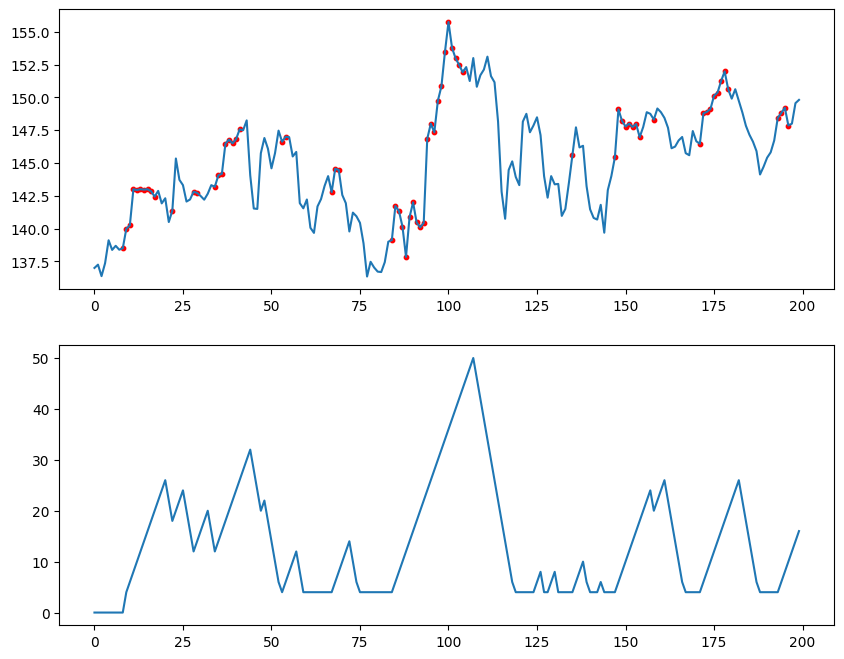

In [56]:
mask = np.array(marker)>0

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(np.arange(0, len(X), 1), X)
ax1.scatter(np.arange(0, len(X), 1)[mask], np.array(X)[mask], marker="o", color='red', s=10)
ax2.plot(np.arange(0, len(s), 1), s)

plt.show()

In [51]:
s[140:150]

[4, 4, 4, 6.0, 4, 4, 4, 4, 6.0, 8.0]